In [7]:
%matplotlib inline
%pylab inline
%config InlineBackend.figure_format = 'retina'


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [8]:
# From https://github.com/joferkington/oost_paper_code/blob/master/error_ellipse.py
from matplotlib.pyplot import *
import numpy as np
from matplotlib.patches import Ellipse

def plot_cov_ellipse(cov, pos, nstd=2, ax=None, **kwargs):
    """
    Plots an `nstd` sigma error ellipse based on the specified covariance
    matrix (`cov`). Additional keyword arguments are passed on to the 
    ellipse patch artist.

    Parameters
    ----------
        cov : The 2x2 covariance matrix to base the ellipse on
        pos : The location of the center of the ellipse. Expects a 2-element
            sequence of [x0, y0].
        nstd : The radius of the ellipse in numbers of standard deviations.
            Defaults to 2 standard deviations.
        ax : The axis that the ellipse will be plotted on. Defaults to the 
            current axis.
        Additional keyword arguments are pass on to the ellipse patch.

    Returns
    -------
        A matplotlib ellipse artist
    """
    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]

    if ax is None:
        ax = plt.gca()

    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwargs)

    ax.add_artist(ellip)
    return ellip

In [49]:
def covplot(c, cmap=cm.PiYG_r, vmin=-1, vmax=1, nstd=0.3, fig=None):
    if fig is None:
        fig = figure(figsize=(8,8))
    
    nw = len(c)
    #imshow(c, interpolation='nearest', cmap=cm.RdPu)
    imshow(c, interpolation='nearest', cmap=cmap, vmin=vmin, vmax=vmax)
    
    xx, yy = np.meshgrid(range(nw), range(nw))
    for ii in range(nw):
        for jj in range(nw):
            c2 = np.array([[c[ii,ii], -c[ii,jj]], [-c[jj,ii], c[jj,jj]]])
            plot_cov_ellipse(c2, [ii,jj], nstd=nstd, edgecolor='none', facecolor='0.1')

    axis([-0.5, nw-0.5, nw-0.5, -0.5])

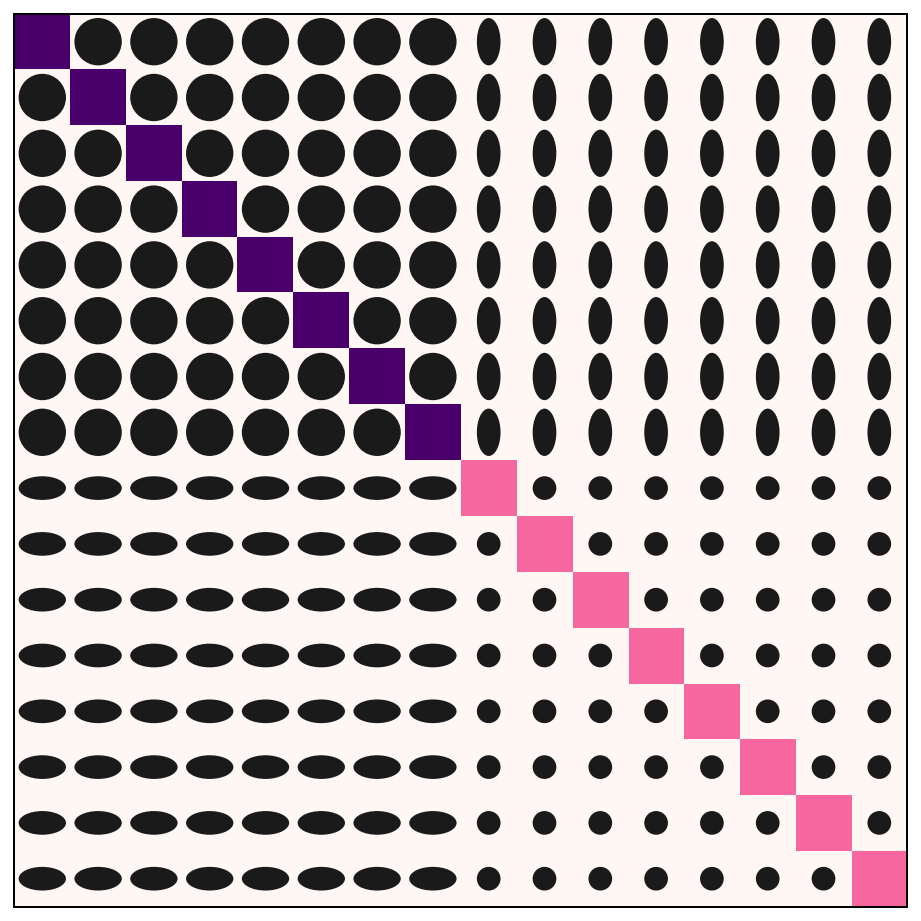

In [80]:
# Plot banded ridge
covplot(np.diag(8*[2] + 8*[0.5]), cmap=cm.RdPu, vmin=0, vmax=1)
xticks([])
yticks([]);

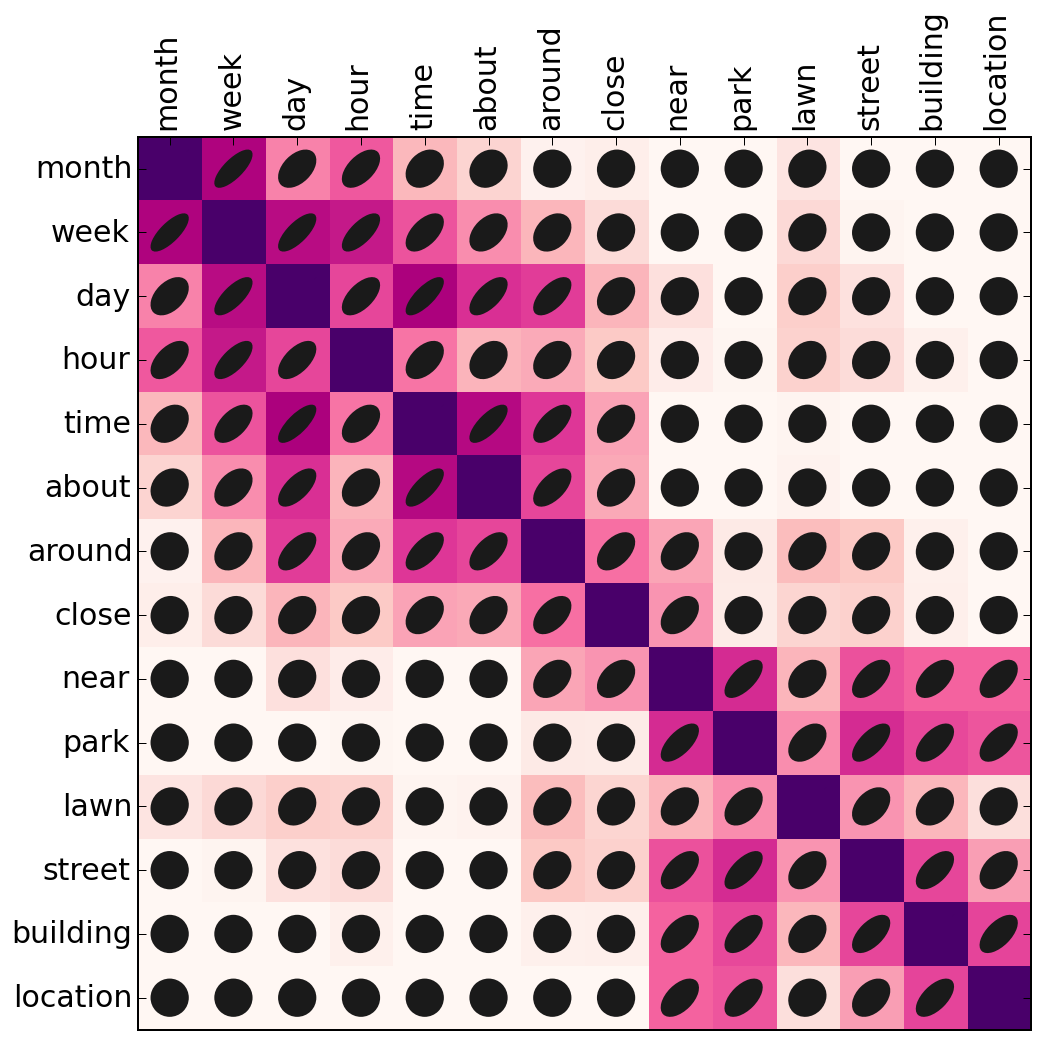

In [76]:
# Plot word embedding (positive only)
words = ['month', 'week', 'day', 'hour', 'time', 
         'about', 'around', 'close', 'near', 
         'park', 'lawn', 'street', 'building', 'location']

wordcov = [[0.9999999993837377, 0.7421983426554759, 0.43936902563295444, 0.5352742327977514, 0.2929560005326574, 0.17905389532716987, 0.0285765208299732, 0.04860593351838625, -0.15840759008484004, -0.11024959352987258, 0.09978269444819794, -0.07786888534972528, -0.09871980557831204, -0.11439229428308031], [0.7421983426554759, 0.9999999993748385, 0.7192157710404126, 0.690083811733222, 0.5490235266629545, 0.4148137638181415, 0.29994230956367535, 0.14490035104734625, -0.1187111888630978, -0.1083646310764548, 0.154867038446281, 0.01243073056175864, -0.13851286468633278, -0.24967744296916705], [0.43936902563295444, 0.7192157710404126, 0.9999999993770318, 0.5802508927102386, 0.750616383842102, 0.6338847487596951, 0.6054354581806849, 0.30207478526553183, 0.12200362849837702, -0.03758739617900059, 0.20079108418057662, 0.11936359529505781, -0.129810249589971, -0.25729362100829434], [0.5352742327977514, 0.690083811733222, 0.5802508927102386, 0.9999999994288756, 0.47064181476562683, 0.30590372573578817, 0.3371067486151348, 0.22282140288711658, 0.05628662939075959, 0.010372820657477145, 0.18775613359057786, 0.14157780506336273, 0.03553890905039478, -0.048480245610528855], [0.2929560005326574, 0.5490235266629545, 0.750616383842102, 0.47064181476562683, 0.9999999992376432, 0.727878131423646, 0.6194784707858411, 0.36234275461557924, -0.02124868264005063, -0.26513814962704574, 0.014437859524043268, -0.053913539524087284, -0.20000374457101208, -0.3569514051805485], [0.17905389532716987, 0.4148137638181415, 0.6338847487596951, 0.30590372573578817, 0.727878131423646, 0.9999999993285009, 0.5793449206948504, 0.3422691101352385, -0.11886257138693085, -0.36600774960139615, 0.024889235879471734, -0.12132598079483806, -0.35841761864516974, -0.4851632925987814], [0.0285765208299732, 0.29994230956367535, 0.6054354581806849, 0.3371067486151348, 0.6194784707858411, 0.5793449206948504, 0.9999999992782724, 0.48414108277961354, 0.3543914617101827, 0.07184752237633715, 0.2744977773118899, 0.23014162152404782, 0.036756727500997725, -0.14645020400024525], [0.04860593351838625, 0.14490035104734625, 0.30207478526553183, 0.22282140288711658, 0.36234275461557924, 0.3422691101352385, 0.48414108277961354, 0.9999999990270276, 0.40068279593955886, 0.0648822281322027, 0.17248461972419038, 0.1916949920372305, 0.04635557599922127, -0.01919383439635591], [-0.15840759008484004, -0.1187111888630978, 0.12200362849837702, 0.05628662939075959, -0.02124868264005063, -0.11886257138693085, 0.3543914617101827, 0.40068279593955886, 0.9999999993548362, 0.6457505895097101, 0.3009016176993148, 0.5509556074227394, 0.5133392761365888, 0.5121371688983759], [-0.11024959352987258, -0.1083646310764548, -0.03758739617900059, 0.010372820657477145, -0.26513814962704574, -0.36600774960139615, 0.07184752237633715, 0.0648822281322027, 0.6457505895097101, 0.9999999995948721, 0.4156033831993956, 0.646981995089992, 0.5752143235994549, 0.545377572210959], [0.09978269444819794, 0.154867038446281, 0.20079108418057662, 0.18775613359057786, 0.014437859524043268, 0.024889235879471734, 0.2744977773118899, 0.17248461972419038, 0.3009016176993148, 0.4156033831993956, 0.9999999995077765, 0.4013609008139896, 0.29562548721268483, 0.12540346448871467], [-0.07786888534972528, 0.01243073056175864, 0.11936359529505781, 0.14157780506336273, -0.053913539524087284, -0.12132598079483806, 0.23014162152404782, 0.1916949920372305, 0.5509556074227394, 0.646981995089992, 0.4013609008139896, 0.9999999994427288, 0.5786825658980278, 0.3779432473514251], [-0.09871980557831204, -0.13851286468633278, -0.129810249589971, 0.03553890905039478, -0.20000374457101208, -0.35841761864516974, 0.036756727500997725, 0.04635557599922127, 0.5133392761365888, 0.5752143235994549, 0.29562548721268483, 0.5786825658980278, 0.9999999994382773, 0.5847485360271969], [-0.11439229428308031, -0.24967744296916705, -0.25729362100829434, -0.048480245610528855, -0.3569514051805485, -0.4851632925987814, -0.14645020400024525, -0.01919383439635591, 0.5121371688983759, 0.545377572210959, 0.12540346448871467, 0.3779432473514251, 0.5847485360271969, 0.9999999994909499]]

#covplot(np.array(wordcov))
covplot(np.clip(np.array(wordcov), 0, np.inf), cmap=cm.RdPu, vmin=0)

gca().xaxis.tick_top()
xticks(range(len(words)), words, fontsize=15, rotation=90)
yticks(range(len(words)), words, fontsize=15);

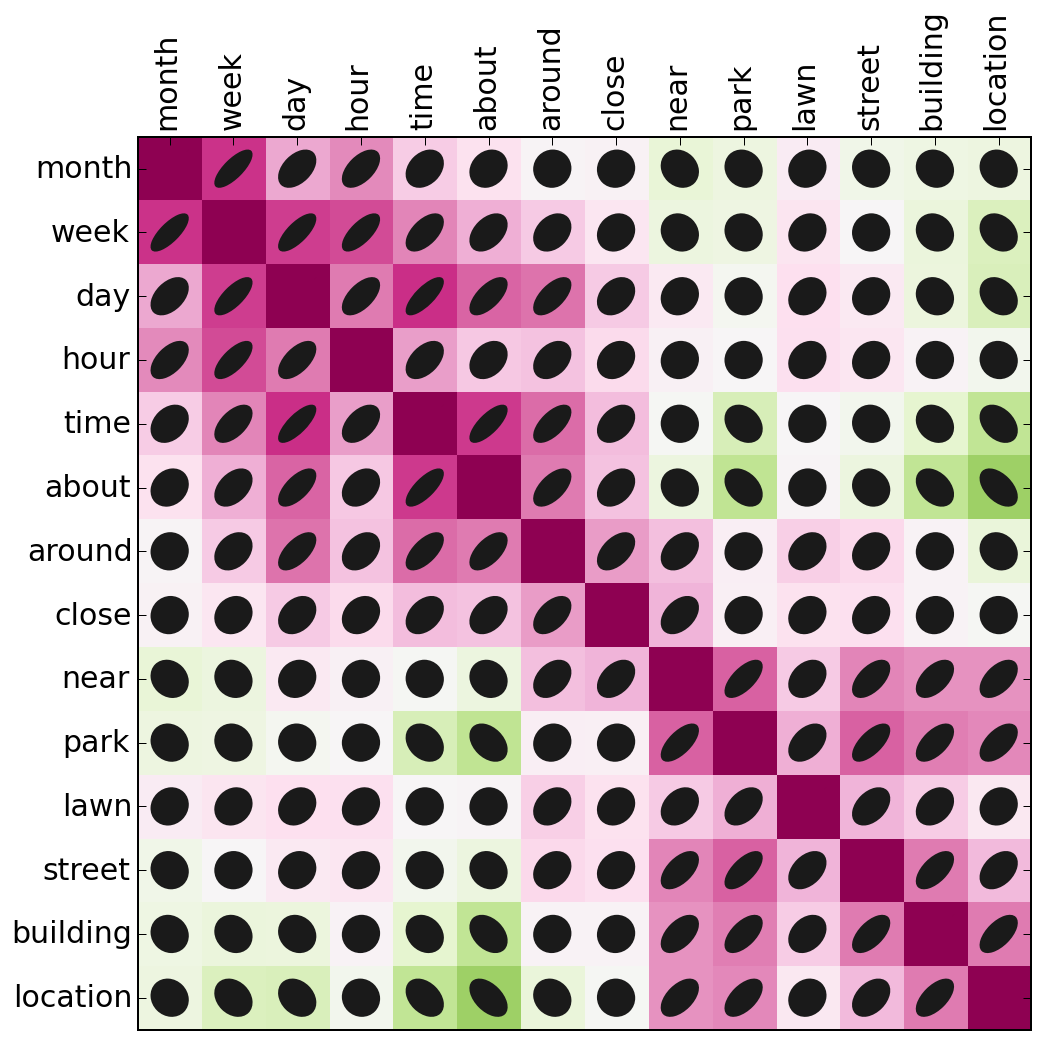

In [82]:
# Plot word embedding (positive and negative)
covplot(np.array(wordcov))

gca().xaxis.tick_top()
xticks(range(len(words)), words, fontsize=15, rotation=90)
yticks(range(len(words)), words, fontsize=15);

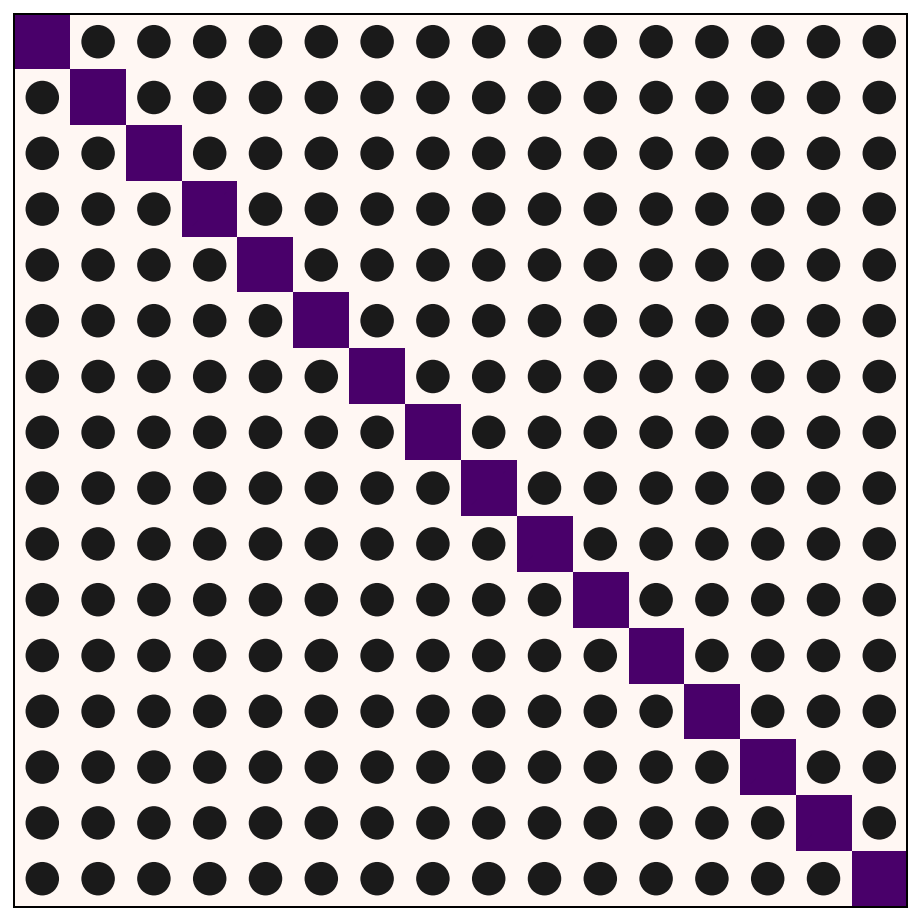

In [55]:
# Plot identity
covplot(np.eye(16), cmap=cm.RdPu, vmin=0)
xticks([])
yticks([]);

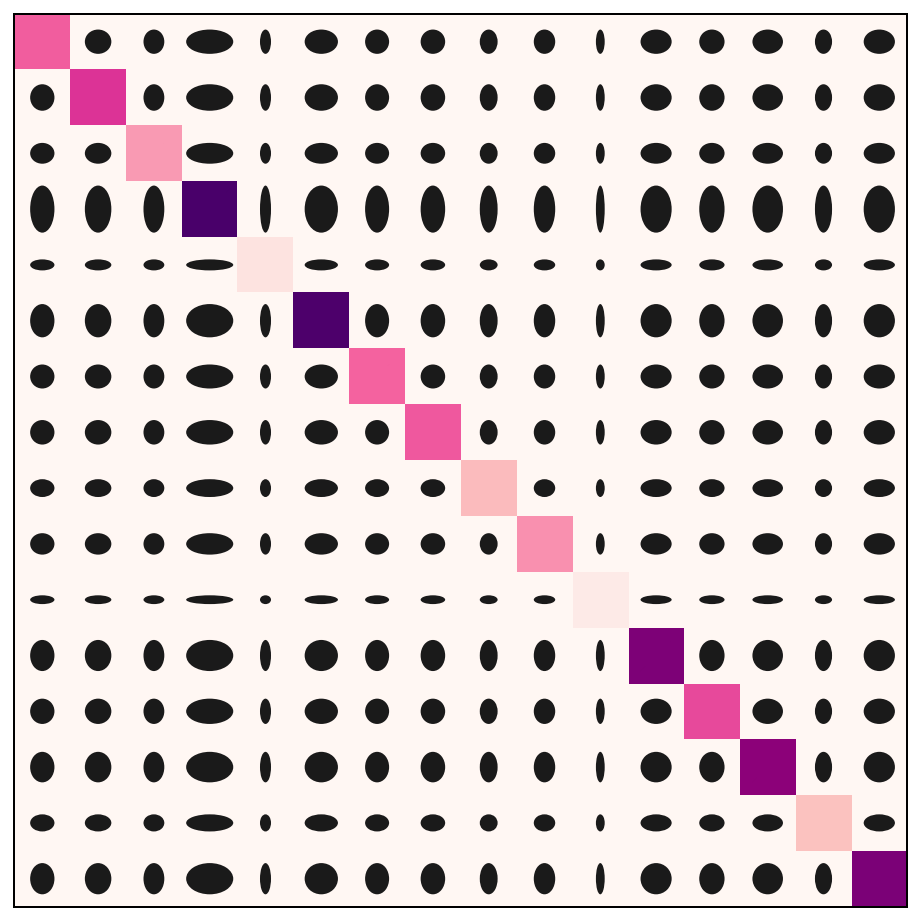

In [74]:
# Plot random diagonal
covplot(np.diag(np.random.rand(16) * 2), cmap=cm.RdPu, vmin=0)
xticks([])
yticks([]);